# Métodos de Taylor e Runge-Kutta 

- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufrgs.br

## Método de Taylor

Consideremos o Problema de Valor Inicial (PVI) descrito por 
$$\begin{cases} 
   y' = f(x,y) \\
   y(x_0)=y_0
  \end{cases}$$


Supondo que a solução $y(x)$ do PVI possui todas as derivadas contínuas no intervalo $[a,b]$ que contém os pontos de discretização $x_0, x_1, \ldots, x_n$ , o desenvolvimento em série de Taylor da função $y(x)$ em torno do ponto $x_n$ é dado por

$$ y(x) = y(x_n) + y'(x_n)(x−x_n) + y''(x_n)\frac{(x-x_n)^2}{2!}+...$$
$$...+y^{(p)}(x_n)\frac{(x-x_n)^p}{p!}+y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$

com $ x_0<\xi<x$. 

Tomando $x = x_n + h$, denotado por $x_{n+1}$ , assim, $h = x_{n+1} − x_n$ e temos:

$$ y(x_{n+1}) = y(x_n) + y'(x_n)h + y''(x_n)\frac{h^2}{2!}+...$$
$$...+y^{(p)}(x_n)\frac{h^p}{p!}+y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$

Se truncarmos a série de Taylor no p-ésimo termo, temos:

$$ y(x) = y(x_n) + y'(x_n)h + y''(x_n)\frac{h^2}{2!}+...+y^{(p)}(x_n)\frac{h^p}{p!}$$

com um **erro de truncamento** dado pelo último termo da série de Taylor

$$e(x_n)=y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$


Se a função $y(x)$ possui a derivada de ordem $(p + 1)$ contínua no intervalo $[a,b]$, então existe $M = max \left\{ \left|y^{(p+1)}(x)\right|, x \in [a,b] \right\}$, e temos uma estimativa para o erro dada por um limitante superior, de ordem $(p + 1)$, como segue:

$$ |E| \leq \frac{h^{p+1}}{(p+1)!}M$$

Assim, usando a série de Taylor, podemos calcular aproximações para $y(x)$ da seguinte forma:

$$ y(x_{n+1}) = y_n + y'_nh + y''_n\frac{h^2}{2!}+...+y^{(p)}_n\frac{h^p}{p!}$$

onde 

$ y'_n = f(x_n, y_n)$

$ y''_n = f_x(x_n, y_n) + f_y(x_n, y_n)y'_n$

$y'''_n = f_{xx}(x_n, y_n) + 2f_{xy}(x_n, y_n)f(x_n, y_n) + f^2(x_n, y_n)f_{yy}(x_n, y_n) + f^2_y(x_n, y_n)f(x_n, y_n)$

$\vdots $

### Método de Taylor de ordem $p=2$

Truncando o desenvolvimento da série de Taylor em $p=2$, temos:

$$
y_{n+1}=y_n+h y_n^{\prime}+\frac{h^2}{2!} y_n^{\prime \prime}
$$

em que

$$
y_n^{\prime}=f\left(x_n, y_n\right) \quad \text { e } \quad y_n^{\prime \prime}=f_x\left(x_n, y_n\right)+f_y\left(x_n, y_n\right) y_n^{\prime}
$$


Assim,

$$
y_{n+1}=y_n+h f\left(x_n, y_n\right)+\frac{h^2}{2}\left(f_x\left(x_n, y_n\right)+f_y\left(x_n, y_n\right) f\left(x_n, y_n\right)\right)
$$


**Exemplo 1:**  Use o método de Taylor de ordem 2 para integrar numericamente a equação:

$$ \begin {cases}
   \frac{dy}{dx} = x-y+2 \\
    y(0)=2
    \end{cases}$$

de $x = 0$ a $x = 1$ com $N = 5$ subintervalos. Compare os valores e plote o resultado considerando a solução exata $y(x)=e^x - x + 1$.

*Solução:*

Precisamos usar a fórmula de recorrência

$$ y_{n+1} = y_n + y'_nh + y''_n\frac{h^2}{2!} $$

em que

$$ y' = x - y + 2 $$

$$ y'' = 1-y' = 1-(x-y+2) = -x+y-1$$

então

$$ y_{n+1} = y_n + (x_n - y_n + 2)h + (-x_n+y_n-1) \frac{h^2}{2!} $$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dy = lambda x,y: x-y+2
d2y = lambda x,y: -x+y-1

x0 = 0
xn = 1
n = 5 #subintervalos
h=(xn-x0)/n

xi = np.linspace(x0,xn,n+1)
yi = np.zeros(n+1)
yi[0] = 2

In [8]:
for i in range(n):
    yi[i+1] = yi[i] + h*dy(xi[i],yi[i]) + 0.5*(h**2)*d2y(xi[i],yi[i])
    print ("y",i+1,"=",yi[i+1])
print (xi)
print ('Sol. aprox.:',np.round(yi,4))
print ('Sol. exata.:',np.round(np.exp(-xi) + xi + 1, 4))

y 1 = 2.02
y 2 = 2.0724
y 3 = 2.1513679999999997
y 4 = 2.2521217599999996
y 5 = 2.3707398431999995
[0.  0.2 0.4 0.6 0.8 1. ]
Sol. aprox.: [2.     2.02   2.0724 2.1514 2.2521 2.3707]
Sol. exata.: [2.     2.0187 2.0703 2.1488 2.2493 2.3679]


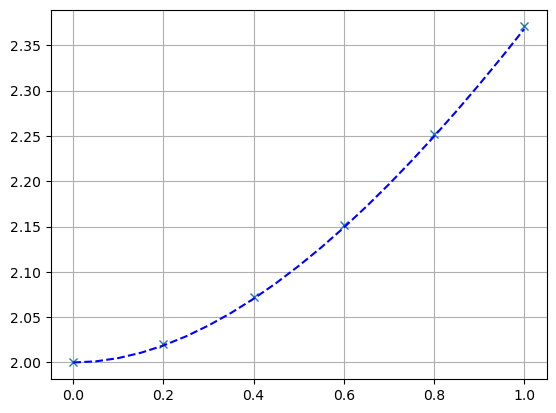

In [10]:
xe = np.linspace(xi[0],xi[-1],21)
ye = np.exp(-xe) + xe + 1

# plotando
plt.plot(xi, yi, "x",xe, ye, 'b--')
plt.grid()
plt.show()

## Métodos de Runge-Kutta 

O método de Runge-Kutta mais simples é o de ordem 1. Neste caso, o método coincide com o método de Euler, isto é, o método de Taylor de ordem 1.

Assim, considerando, novamente, o Problema de Valor Inicial (PVI) dado por

$$\begin{cases} 
   y' = f(x,y) \\
   y(x_0)=y_0
  \end{cases}$$

tem-se o Método de Runge-Kutta como é apresentado a seguir.


### Método de Runge-Kutta de ordem 1

O processo iterativo será dado por:

$$y_{n+1} =y_{n} + h k_{1}$$

com

$$k_1 = f(x_n, y_n)$$


### Método de Runge-Kutta de ordem 2

O processo iterativo será dado por:

$$y_{n+1} =y_n + \frac{h}{2}(k_1+k_2)$$

com
$$ k_1 = f(x_n, y_n)$$

$$ k_2 = f(x_n+h, y_n+hk_1) $$



A figura abaixo ilustra uma  interpretação gráfica do método.

<img src="https://raw.githubusercontent.com/felipeminuzzi/NumericalMath/main/CalcNum/figs/runge_kutta_ordem_2.png" width="600">

**Exemplo 2:** Usando o método de Runge Kutta, ordem 2, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $N = 5$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.0, 2.02, 2.0724, 2.151368, 2.25212176, 2.3707398432]
[2.         2.01873075 2.07032005 2.14881164 2.24932896 2.36787944]


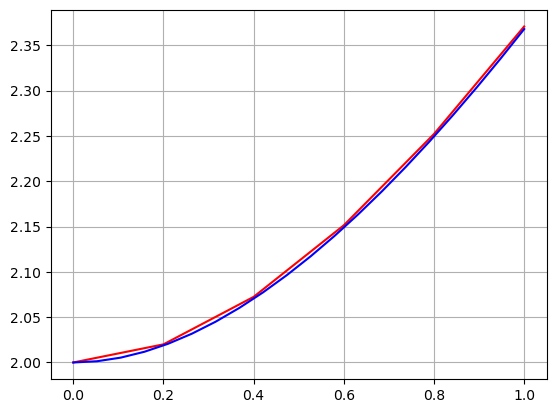

In [12]:
f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N

for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+h, Y[n]+h*k1)
    Y.append(Y[n]+0.5*h*(k1+k2))
print (Y)  

s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(a,b, 20)
Ye = s(Xe)
print (s(X))

# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()

### Método de Runge-Kutta de ordem 3

O método de Runge-Kutta ordem 3 é dado por

$$ y_{n+1} =y_n + \frac{h}{9}(2k_1 + 3k_2 + 4k_3) $$

com

$$ k_1 = f(x_n , y_n)$$

$$ k_2 = f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_1) $$

$$ k_3 = f(x_n + \frac{3}{4}h, y_n + \frac{3}{4}hk_2) $$


**Exemplo 3:** Usando o método de Runge-Kutta de ordem 3, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $h=0.2$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.     2.0187 2.0702 2.1487 2.2492 2.3677]


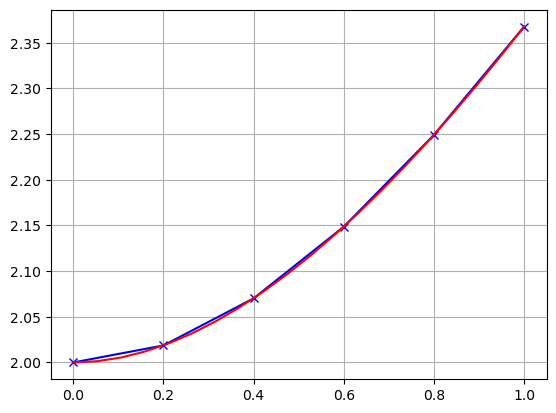

In [13]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N
for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+0.5*h, Y[n]+0.5*h*k1)
    k3 = f(X[n]+0.75*h, Y[n]+0.75*h*k2)
    Y.append(Y[n] + (h/9) * (2*k1 + 3*k2 + 4*k3))
    #print (k1,Y[-1])
print (np.round(Y,4))

# plota
plt.plot(X, Y, "xb-", Xe, Ye, "r-")
plt.grid()
plt.show()
import numpy as np
import matplotlib.pyplot as plt

### Método de Runge-Kutta de ordem 4

O método de Runge-Kutta ordem 4 é dado po

$$ y_{n+1} =y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 +k4) $$

com

$$ k_1 = f(x_n , y_n)$$

$$ k_2 = f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_1) $$

$$ k_3 = f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_2) $$

$$ k_4 = f(x_n + h, y_n + hk_3) $$

**Exemplo 4** Usando o método de Runge-Kutta de ordem 4, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $h=0.2$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.     2.0187 2.0703 2.1488 2.2493 2.3679]


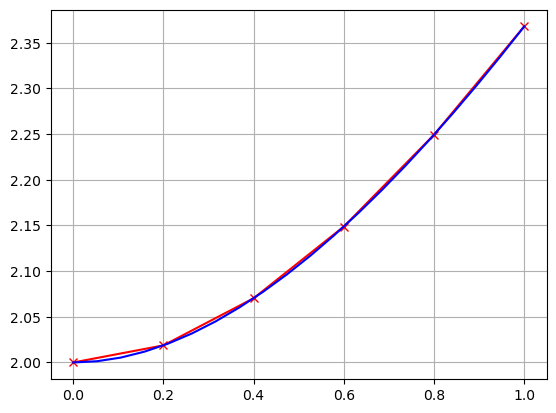

In [5]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N
for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+0.5*h, Y[n]+0.5*h*k1)
    k3 = f(X[n]+0.5*h, Y[n]+0.5*h*k2)
    
    k4 = f(X[n]+h, Y[n]+h*k3)
    Y.append(Y[n] + (h/6) * (k1 + 2*k2 + 2*k3 + k4))
    #print (k1,Y[-1])
print (np.round(Y,4))

# plota
plt.plot(X, Y, "xr-", Xe, Ye, "b-")
plt.grid()
plt.show()

**Exercícios:**

**1.**  Dado o problema de valor inicial

$$
y^{\prime}=\frac{1}{t^2}-\frac{y}{t}-y^2, \quad 1 \leq t \leq 2, \quad y(1)=-1
$$

com solução exata $y(t)=-1 / t$ :

(a) Use o método de Taylor de segunda ordem com $h=0,05$ para encontrar uma aproximação da solução e compare-a com os valores reais de $y$.

(b) Use o método de Taylor de quarta ordem com $h=0,05$ para aproximar a solução e compare-a com os valores reais de $y$.

**2.** Use o método de Taylor de segunda ordem para encontrar uma aproximação das soluções de cada um dos seguintes problemas de valor inicial. Se possível, obtenha a solução exata e compare. 

(a) $y^{\prime}=y / t-(y / t)^2, \quad 1 \leq t \leq 1,2, \quad y(1)=1, \quad \operatorname{com} h=0,1$

(b) $y^{\prime}=\operatorname{sen} t+e^{-t}, \quad 0 \leq t \leq 1, \quad y(0)=0, \quad \operatorname{com} h=0,5$

(c) $y^{\prime}=\left(y^2+y\right) / t, \quad 1 \leq t \leq 3, \quad y(1)=-2, \quad \operatorname{com} h=0,5$

(d) $y^{\prime}=-t y+4 t y^{-1}, \quad 0 \leq t \leq 1, \quad y(0)=1, \quad \operatorname{com} h=0,25$

**3.** Use o método de Taylor de segunda ordem para encontrar uma aproximação das soluções de cada um dos seguintes problemas de valor inicial. Se possível, obtenha a solução exata e compare. 

(a) $y^{\prime}=\frac{2-2 t y}{t^2+1}, \quad 0 \leq t \leq 1, \quad y(0)=1, \operatorname{com} h=0,1$

(b) $y^{\prime}=\frac{y^2}{1+t}, \quad 1 \leq t \leq 2, \quad y(1)=-(\ln 2)^{-1}, \operatorname{com} h=0,1$

(c) $y^{\prime}=\left(y^2+y\right) / t, \quad 1 \leq t \leq 3, \quad y(1)=-2, \quad$ com $h=0,2$

(d) $y^{\prime}=-t y+4 t / y, \quad 0 \leq t \leq 1, \quad y(0)=1, \quad \operatorname{com} h=0,1$

**4.** Repita o Exercício 3 usando o método de Taylor de quarta ordem.

**5.** Repita o Exercício 4 usando o método de Taylor de quarta ordem.

**6.** Repita todos exercícios anteriores usando os métodos de Runge-Kutta de ordem 3 e 4.